# <center >Data Science with Python 
## <center >Statistical and Data Techniques in Data Science 
##  <center> Homework 4

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Question 1: Data information
* Download data from the link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
(or `customers.csv` in the folder attached ).
* Import the data as the name 'data' and check the data head, shape, types, columms. (*Hint:*   `.head()`, `.shape`, `.dtypes`, `.columns.tolist()`.).
* Convert columns excluding 'Channel' and 'Region' to floats if necessary (*Hint:*  `.astype(np.float)`.)
* Drop out 'Chanel','Region' 'Frozen', 'Detergents_Paper', 'Delicassen' as they will not be used 

In [1]:
import pandas as pd
import numpy as np
# Write your code from here, add more cells if needed
data=pd.read_csv('customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicatessen        440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [2]:
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185

In [3]:
data.shape

(440, 8)

In [4]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

In [5]:
a=data.columns.tolist()

In [6]:
data=data.drop(['Region','Frozen', 'Detergents_Paper', 'Delicatessen'],axis=1)

In [7]:
data.head()

Channel  Fresh  Milk  Grocery
0        2  12669  9656     7561
1        2   7057  9810     9568
2        2   6353  8808     7684
3        1  13265  1196     4221
4        2  22615  5410     7198

### Quesiton 2: Statistical Description
In this question, we only work on the feature 'Grocery'.
 * Calculate the min, Q1 (i.e., 25%),  median, , Q3(i.e.,75%), max of the annual spending on grocery products
 * Calculate the mean, range, standard deviation (std), skewness, kurtosis index of the annual spending on grocery products.
 * Make a boxplot of the annual spending on grocery products.
 * Make a histogram of the annual spending on grocery products.

In [8]:
# Write your answer from here, add more cells if needed
print("Q1=",data['Grocery'].quantile(q=0.25))
print("Q2=",data['Grocery'].quantile(q=0.5))
print("Q3=",data['Grocery'].quantile(q=0.75))

Q1= 2153.0
Q2= 4755.5
Q3= 10655.75


In [9]:
data['Grocery'].mean()

7951.277272727273

In [10]:
data['Grocery'].max()-data['Grocery'].min()

92777

In [11]:
data['Grocery'].min()

3

In [12]:
data['Grocery'].std()

9503.162828994346

In [13]:
data['Grocery'].skew()

3.5874286903915453

In [14]:
data['Grocery'].kurt()

20.914670390919653

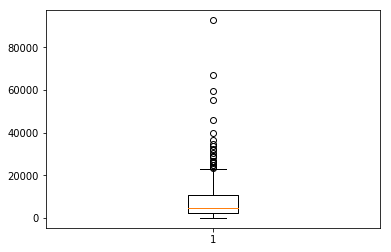

In [16]:
import matplotlib.pyplot as plt
plt.boxplot(data['Grocery'])
plt.show()

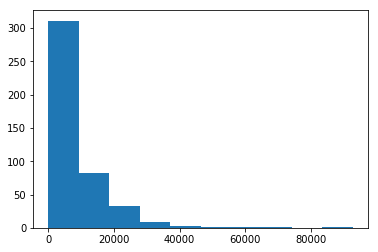

In [17]:
plt.hist(data['Grocery'])
plt.show()

### Question 3: Correlation
* Calculate the correlation of 'Grocery' and 'Milk'.
* Make a scatter plot of 'Grocery' and 'Milk'. (*Hint:* Using Matplotlib `.scatter`)
* Make a scatter plot of features together. (*Hint:*  Using Panda `.scatter_matrix`)
* Make a heatmap of features together. (*Hint:* Using Seaborn `.heatmap` )

<function matplotlib.pyplot.show(*args, **kw)>

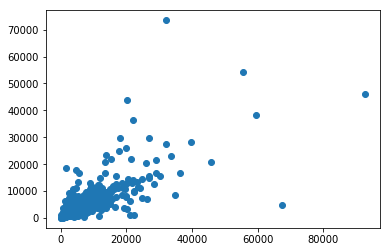

In [38]:
# Write your answer from here, add more cells if needed
plt.scatter(data['Grocery'],data['Milk'])
plt.show

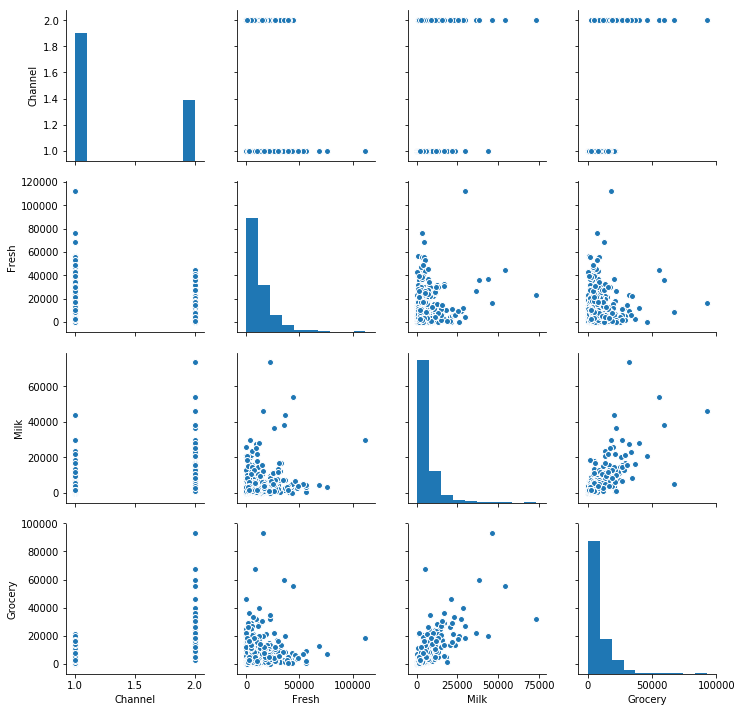

In [42]:
sns.pairplot(data)

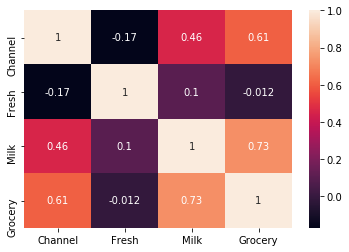

In [18]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

### Question 4: Hypothesis testing (part 1)
* Find the p-values of the non-correlation of pairs: ('Grocery', 'Milk'), ('Grocery', 'Fresh'), ('Fresh','Milk').
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the hypothesis:"'Grocery' and 'Milk' are corellated."
* With the significance level 0.1 (p-given or $\alpha$=0.1), do we reject or accept the NULL hypothesis:"'Grocery' and 'Milk' are non-corellated."

In [22]:
import scipy.stats as ss
c1,p1=ss.pearsonr(data['Grocery'],data['Milk'])
c2,p2=ss.pearsonr(data['Grocery'],data['Fresh'])
c3,p3=ss.pearsonr(data['Fresh'],data['Milk'])
print('c1=',c1)
print('p1=',p1)
print('c2=',c2)
print('p2=',p2)
print('c3=',c3)
print('p3=',p3)

c1= 0.7283351181536448
p1= 6.480570788053402e-74
c2= -0.011853874984010514
p2= 0.8041728013490431
c3= 0.1005097682998585
p3= 0.03506100703784227


In [ ]:
p=0.1


### Question 5: Data Preprocessing
* Transform the data by using `np.log` and set the new data as the name 'log_data', then visualize this data by using `pd.scatter_matrix`.
* Remove outliers of each features of 'log_data' whose are out of the fencies "$Q1-IQR*1.5$" and "$Q3+IQR*1.5$", set the new data by the name 'good_log_data' then visualize this data.  

In [26]:
log_data=np.log(data)
log_data.head()

Channel      Fresh      Milk   Grocery
0  0.693147   9.446913  9.175335  8.930759
1  0.693147   8.861775  9.191158  9.166179
2  0.693147   8.756682  9.083416  8.946896
3  0.000000   9.492884  7.086738  8.347827
4  0.693147  10.026369  8.596004  8.881558

In [33]:
outliers=[]

# For each feature find the data points with extreme high or low values
for feature in 'Channel', 'Fresh', 'Milk', 'Grocery':
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25.)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75.)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    print("Outlier step:", step)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    feature_outliers= data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(feature_outliers) 
    outliers += feature_outliers.index.tolist() 

Outlier step: 1.0397207708399179
Data points considered outliers for the feature 'Channel':


Empty DataFrame
Columns: [Channel, Fresh, Milk, Grocery]
Index: []

Outlier step: 2.533507868606793
Data points considered outliers for the feature 'Fresh':


Channel  Fresh   Milk  Grocery
65         2     85  20959    45828
66         1      9   1534     7417
81         2    219   9540    14403
95         1      3   2920     6252
96         2     23   2616     8118
128        1    140   8847     3823
171        2    200  25862    19816
193        2    180   3485    20292
218        2     18   7504    15205
304        2    161   7460    24773
305        2    243  12939     8852
338        1      3    333     7021
353        2    117   6264    21203
355        1    190    727     2012
357        2     37   1275    22272
412        1     97   3605    12400

Outlier step: 2.318248272818475
Data points considered outliers for the feature 'Milk':


Channel  Fresh   Milk  Grocery
86         2  22925  73498    32114
98         1    503    112      778
154        1    622     55      137
356        1  22686    134      218

Outlier step: 2.3988562137971394
Data points considered outliers for the feature 'Grocery':


Channel  Fresh  Milk  Grocery
75         1  20398  1137        3
154        1    622    55      137

In [34]:
good_log_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True) 
print("Number of outliers (inc duplicates): ", len(outliers))
print("New dataset with removed outliers has {} samples with {} features each.".format(*good_log_data.shape))

Number of outliers (inc duplicates):  22
New dataset with removed outliers has 419 samples with 4 features each.


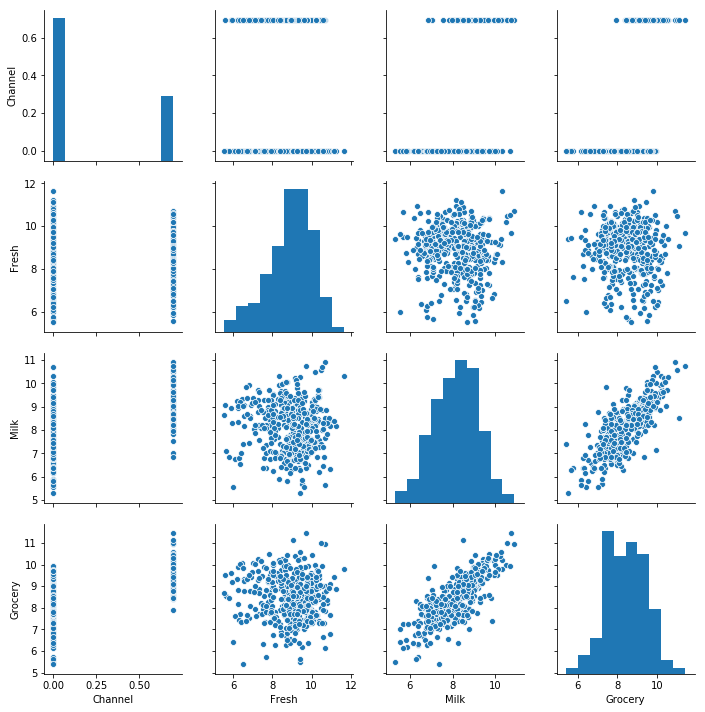

In [35]:
sns.pairplot(good_log_data)

### Question 6: Hypothesis testing (part 2) 

 By the method one-sample-t-test, do we accept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The mean of 'Fresh' population (after log-transform) by using the log_data set is different 8.8
* The mean of 'Fresh' population (after log-transform) by using the good_log_data set is differenct 8.8

By the method of two-sample-t-test, do we acept the following hypotheses with the significant value 0.05 (i.e., p_given)?
* The means of 'Fresh' in the log_data and good_log_data are different
* The means of 'Milk' in the log_data and good_log_data are different


In [ ]:
# Write your answer from here, add more cells if needed